In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random
import seaborn as sns


class FrozenLakev1:

    
    def __init__(self, episodes, discount_factor_g = 0.9, learning_rate_a = 0.9, epsilon_decay_rate = 0.0001, render = False):
        self.episodes = episodes
        self.learning_rate_a = learning_rate_a
        self.epsilon_decay_rate = epsilon_decay_rate
        self.discount_factor_g = discount_factor_g
        self.render = render
        self.epsilon = 1
        self.reward = None
        self.rewards_per_episode = None
        self.moving_avg = None
        self.avg_reward = None
        self.success_rate = None
        self.std_dev = None

    
    def train_and_run(self):
        
        env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True, render_mode = "human" if self.render else None)
        q = np.zeros((env.observation_space.n, env.action_space.n))
    
        epsilon = 1
        seed_value = random.randint(1,200)
        rng = np.random.default_rng(seed_value)
        self.rewards_per_episode = np.zeros(self.episodes)
    
        for i in range(self.episodes):
            state = env.reset()[0]
            terminated = False
            truncated = False
    
            while (not truncated and not terminated): 
                if rng.random() < epsilon:
                    action = env.action_space.sample()
                else:
                    action = np.argmax(q[state,:])
                    
                new_state , self.reward, truncated, terminated, _ = env.step(action)
        
                q[state,action] = q[state,action] + self.learning_rate_a * (
                    self.reward + self.discount_factor_g * np.max(q[new_state,:]) - q[state,action]
                )
                
                state = new_state
    
            epsilon = max(epsilon - self.epsilon_decay_rate, 0)      
    
            if(epsilon == 0):
                self.learning_rate_a = 0.0001
    
            if self.reward == 1:
                self.rewards_per_episode[i] = 1
            
        env.close()
    
        self.avg_reward = np.mean(self.rewards_per_episode)
        self.success_rate = np.mean(self.rewards_per_episode[-3000:])
        self.std_dev = np.std(self.rewards_per_episode)
        self.moving_avg = [np.mean(self.rewards_per_episode[max(0, i - 100):i + 1]) for i in range(len(self.rewards_per_episode))]

    
    def test(self, q_table):
        test_env = gym.make("FrozenLake-v1", map_name="8x8", is_slippery=True)
        total_reward = 0
        for _ in range(100):
            state = test_env.reset()[0]
            done = False
            while not done:
                action = np.argmax(q_table[state])
                state, reward, terminated, truncated, _ = test_env.step(action)
                done = terminated or truncated
                total_reward += reward
        print("Test Başarı Oranı: {:.4f}".format(total_reward / 100))
        test_env.close()
    
    
    def plt_succes(self):
        plt.plot(self.moving_avg)
        plt.title("Başarı Ortalaması")
        plt.xlabel("Episode")
        plt.ylabel("Başarı (Ortalama Ödül)")

    
    def get_succes_rate(self):
        print("Avg Reward: {:.4f}".format(self.avg_reward), 
              " Succes Rate: {:.4f}".format(self.success_rate), 
              " Rewards Per Episode: {:.4f}".format(self. std_dev))
        return(self.avg_reward, self.success_rate, self. std_dev)



    def add_results_dict(self, results_dict, title):
        if title not in results_dict:
            results_dict[title] = []          
        min_reward = np.mean(self.rewards_per_episode[-3000:-1500])
        max_reward = np.max(self.rewards_per_episode[-1500:])
        results_dict[title].append(min_reward)
        results_dict[title].append(max_reward)
        


def plt_results_dict(results_dict): 
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=list(results_dict.values()))
    plt.xticks(ticks=range(len(results_dict)), labels=results_dict.keys(), rotation=45)
    plt.title("Hiperparametre Karşılaştırması - Başarı Oranı")
    plt.ylabel("Başarı Oranı")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def worker(episodes, alpha, gamma, epsilon_decay, label, results_dict):
    fl = FrozenLakev1(
        episodes=episodes,
        learning_rate_a=alpha,
        discount_factor_g=gamma,
        epsilon_decay_rate=epsilon_decay
    )
    fl.train_and_run()
    fl.add_results_dict(results_dict, label)




Avg Reward: 0.1389  Succes Rate: 0.3687  Rewards Per Episode: 0.3458


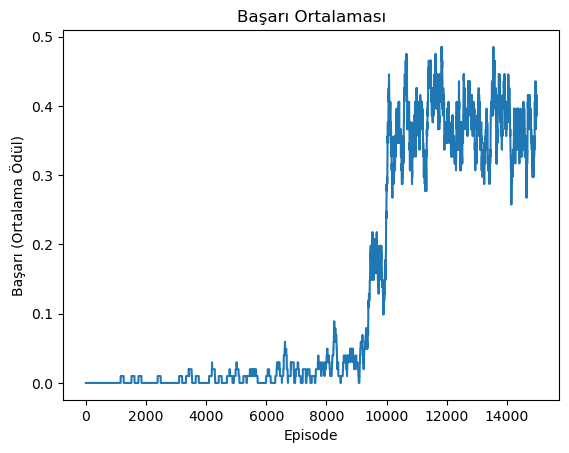

In [2]:
fl1 = FrozenLakev1(episodes = 15000, learning_rate_a = 0.9, discount_factor_g = 0.9, epsilon_decay_rate = 0.0001)
fl1.train_and_run()

fl1.get_succes_rate()
fl1.plt_succes()

results_dict = {}

fl1.add_results_dict(results_dict, "episode: 15000, alpha: 0.9, gamma: 0.9, epsilon: 0.0001")

Avg Reward: 0.1341  Succes Rate: 0.1893  Rewards Per Episode: 0.3407


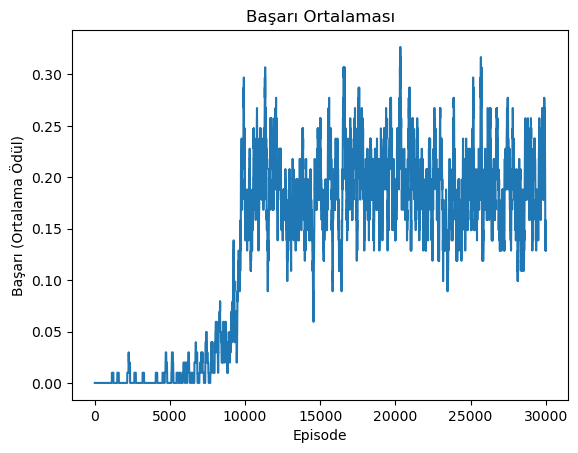

In [3]:
fl2 = FrozenLakev1(episodes = 30000, learning_rate_a = 0.95, discount_factor_g = 0.9, epsilon_decay_rate = 0.0001)
fl2.train_and_run()

fl2.get_succes_rate()
fl2.plt_succes()

fl2.add_results_dict(results_dict, "episode: 30000, alpha: 0.95, gamma: 0.9, epsilon: 0.0001")

Avg Reward: 0.1620  Succes Rate: 0.4347  Rewards Per Episode: 0.3685


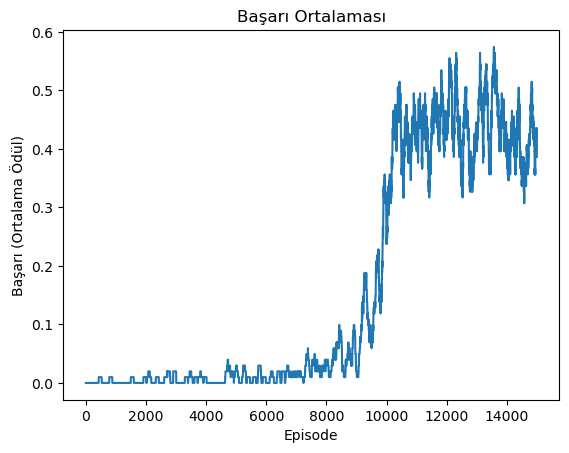

In [4]:
fl3= FrozenLakev1(episodes = 15000, learning_rate_a = 0.85, discount_factor_g = 0.9, epsilon_decay_rate = 0.0001)
fl3.train_and_run()

fl3.get_succes_rate()
fl3.plt_succes()

fl3.add_results_dict(results_dict, "episode: 15000, alpha: 0.85, gamma: 0.9, epsilon: 0.0001")

Avg Reward: 0.1884  Succes Rate: 0.5127  Rewards Per Episode: 0.3910


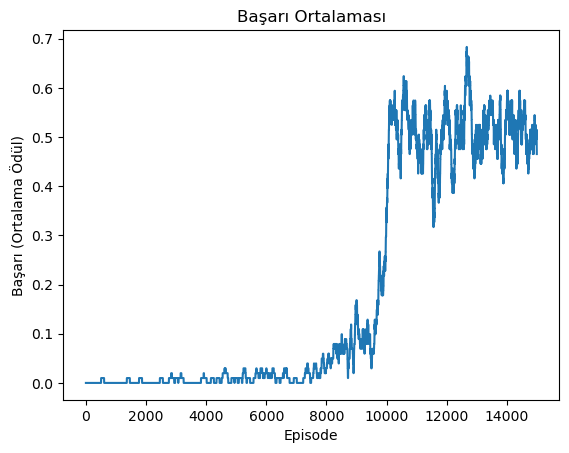

In [29]:
fl4 = FrozenLakev1(episodes = 15000, learning_rate_a = 0.85, discount_factor_g = 0.97, epsilon_decay_rate = 0.0001)
fl4.train_and_run()

fl4.get_succes_rate()
fl4.plt_succes()

fl4.add_results_dict(results_dict, "episode: 15000, alpha: 0.85, gamma: 0.97, epsilon: 0.0001")

Avg Reward: 0.1311  Succes Rate: 0.3333  Rewards Per Episode: 0.3375


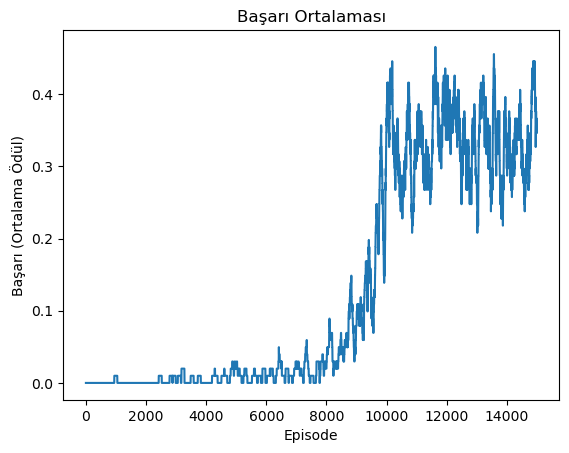

In [6]:
fl5 = FrozenLakev1(episodes = 15000, learning_rate_a = 0.85, discount_factor_g = 0.95, epsilon_decay_rate = 0.0001)
fl5.train_and_run()

fl5.get_succes_rate()
fl5.plt_succes()

fl5.add_results_dict(results_dict, "episode: 15000, alpha: 0.85, gamma: 0.95, epsilon: 0.0001")

Avg Reward: 0.1719  Succes Rate: 0.4607  Rewards Per Episode: 0.3773


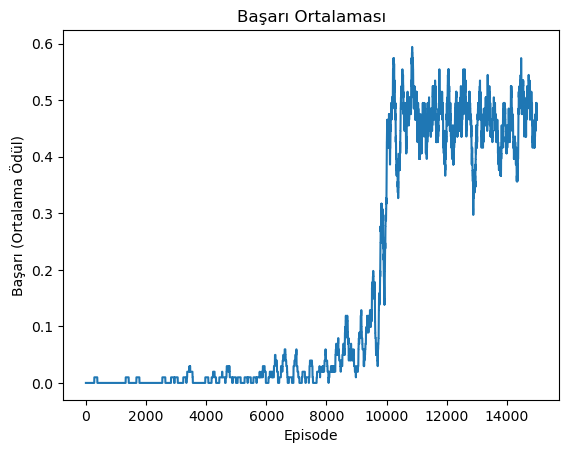

In [7]:
fl6 = FrozenLakev1(episodes = 15000, learning_rate_a = 0.85, discount_factor_g = 0.93, epsilon_decay_rate = 0.0001)
fl6.train_and_run()

fl6.get_succes_rate()
fl6.plt_succes()

fl6.add_results_dict(results_dict, "episode: 15000, alpha: 0.85, gamma: 0.93, epsilon: 0.0001")

Avg Reward: 0.1016  Succes Rate: 0.2547  Rewards Per Episode: 0.3021


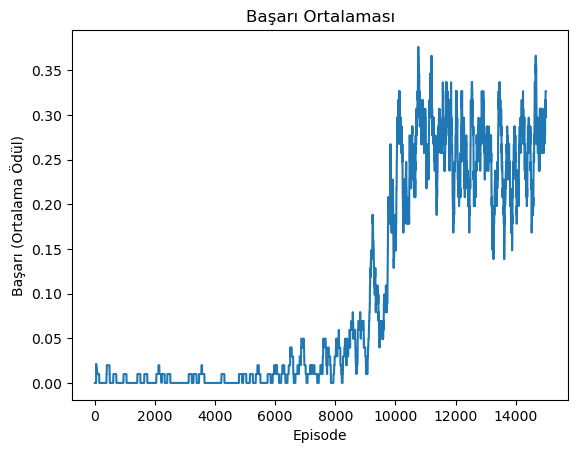

In [8]:
fl7 = FrozenLakev1(episodes = 15000, learning_rate_a = 0.85, discount_factor_g = 0.85, epsilon_decay_rate = 0.0001)
fl7.train_and_run()

fl7.get_succes_rate()
fl7.plt_succes()

fl7.add_results_dict(results_dict, "episode: 15000, alpha: 0.85, gamma: 0.85, epsilon: 0.0001")

Avg Reward: 0.3821  Succes Rate: 0.4670  Rewards Per Episode: 0.4859


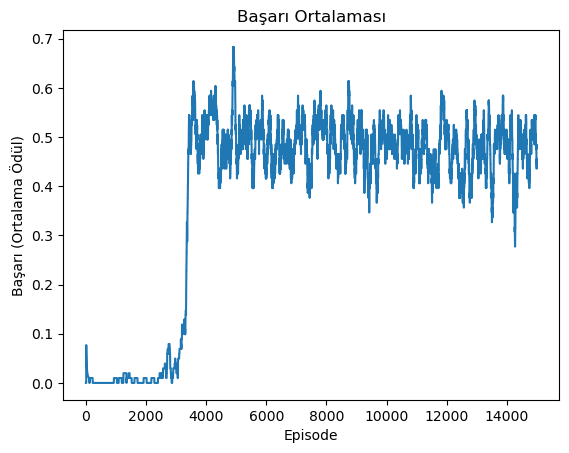

In [9]:
fl8 = FrozenLakev1(episodes = 15000, learning_rate_a = 0.85, discount_factor_g = 0.93, epsilon_decay_rate = 0.0003)
fl8.train_and_run()

fl8.get_succes_rate()
fl8.plt_succes()

fl8.add_results_dict(results_dict, "episode: 15000, alpha: 0.85, gamma: 0.93, epsilon: 0.0003")

Avg Reward: 0.1028  Succes Rate: 0.4400  Rewards Per Episode: 0.3037


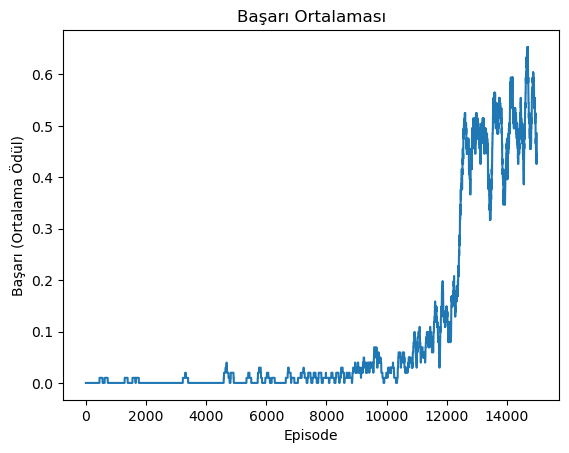

In [74]:
fl9 = FrozenLakev1(episodes = 15000, learning_rate_a = 0.85, discount_factor_g = 0.93, epsilon_decay_rate = 0.00008)
fl9.train_and_run()

fl9.get_succes_rate()
fl9.plt_succes()

fl9.add_results_dict(results_dict, "episode: 15000, alpha: 0.85, gamma: 0.93, epsilon: 0.00005")

Avg Reward: 0.1503  Succes Rate: 0.2230  Rewards Per Episode: 0.3573


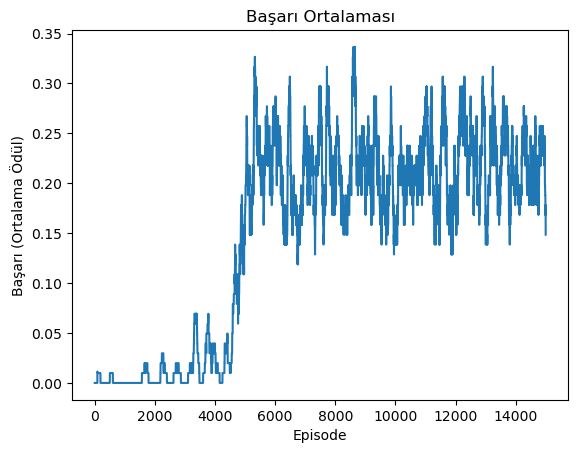

In [59]:
fl10 = FrozenLakev1(episodes = 15000, learning_rate_a = 0.85, discount_factor_g = 0.93, epsilon_decay_rate = 0.0002)
fl10.train_and_run()

fl10.get_succes_rate()
fl10.plt_succes()

fl10.add_results_dict(results_dict, "episode: 15000, alpha: 0.85, gamma: 0.93, epsilon: 0.0002")

Avg Reward: 0.1504  Succes Rate: 0.3863  Rewards Per Episode: 0.3575


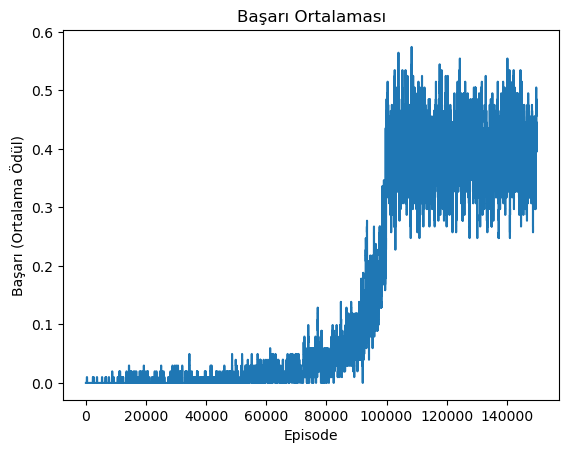

In [12]:
fl10 = FrozenLakev1(episodes = 150000, learning_rate_a = 0.85, discount_factor_g = 0.93, epsilon_decay_rate = 0.00001)
fl10.train_and_run()

fl10.get_succes_rate()
fl10.plt_succes()

fl10.add_results_dict(results_dict, "episode: 150000, alpha: 0.85, gamma: 0.93, epsilon: 0.00002")

Avg Reward: 0.1716  Succes Rate: 0.4647  Rewards Per Episode: 0.3771


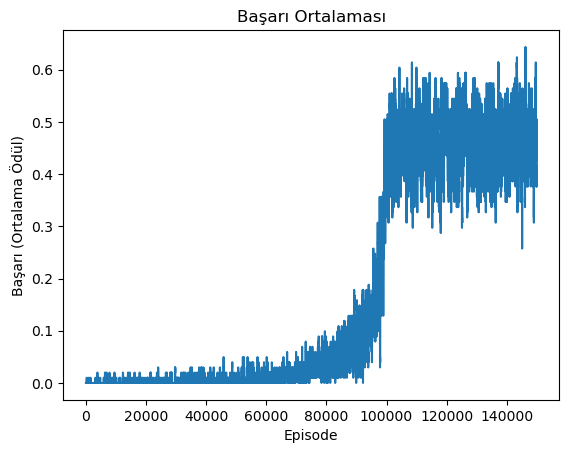

In [13]:
fl11 = FrozenLakev1(episodes = 150000, learning_rate_a = 0.85, discount_factor_g = 0.95, epsilon_decay_rate = 0.00001)
fl11.train_and_run()

fl11.get_succes_rate()
fl11.plt_succes()

fl11.add_results_dict(results_dict, "episode: 150000, alpha: 0.85, gamma: 0.95, epsilon: 0.00001")

In [14]:
import multiprocessing

processes = []
p = multiprocessing.Process(target=worker, args=(150000, 0.85, 0.95, 0.00001, "episode: 150000, alpha: 0.85, gamma: 0.93, epsilon: 0.00002", results_dict))
p.start()
processes.append(p)
p.join()

In [80]:
results_dict

{'episode: 15000, alpha: 0.9, gamma: 0.9, epsilon: 0.0001': [0.36533333333333334,
  1.0],
 'episode: 30000, alpha: 0.95, gamma: 0.9, epsilon: 0.0001': [0.17933333333333334,
  1.0],
 'episode: 15000, alpha: 0.85, gamma: 0.9, epsilon: 0.0001': [0.446, 1.0],
 'episode: 15000, alpha: 0.85, gamma: 0.97, epsilon: 0.0001': [0.0,
  0.0,
  0.5193333333333333,
  1.0],
 'episode: 15000, alpha: 0.85, gamma: 0.95, epsilon: 0.0001': [0.3353333333333333,
  1.0],
 'episode: 15000, alpha: 0.85, gamma: 0.93, epsilon: 0.0001': [0.46266666666666667,
  1.0],
 'episode: 15000, alpha: 0.85, gamma: 0.85, epsilon: 0.0001': [0.254, 1.0],
 'episode: 15000, alpha: 0.85, gamma: 0.93, epsilon: 0.0003': [0.456, 1.0],
 'episode: 15000, alpha: 0.85, gamma: 0.93, epsilon: 0.0005': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'episode: 15000, alpha: 0.85, gamma: 0.93, epsilon: 0.0002': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

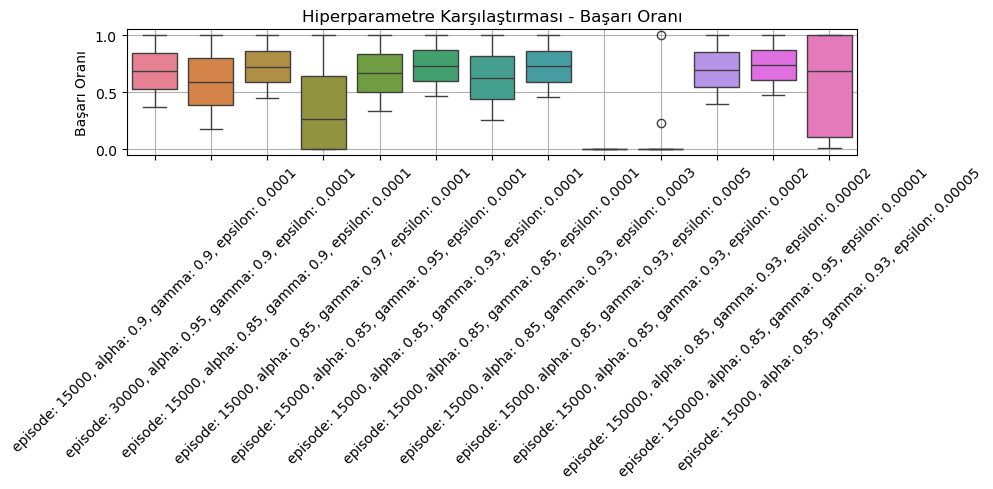

In [82]:
plt_results_dict(results_dict)